In [14]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt
from common.functions import sigmoid, softmax
import pickle

In [15]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

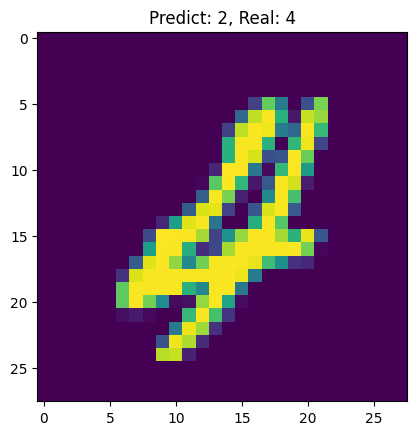

In [20]:
import random

x, t = get_data() # 정규화 및 1차원 배열로 변환
network = init_network() # sample_weight.pkl 불러오기

random_index = random.randint(0, len(x) - 1)
random_image = x[random_index]
random_label = t[random_index]

predicted_output = predict(network, random_image) # 랜덤이미지를 predict로 추론
predicted_label = np.argmax(predicted_output) # 높은 값의 인덱스 찾기

plt.imshow(random_image.reshape(28, 28)) 
plt.title(f"Predict: {predicted_label}, Real: {random_label}")
plt.show()